In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib

import seaborn as sns


Using matplotlib backend: MacOSX


In [2]:
iamc_org = pd.read_excel('iamc15_scenario_data_all_regions_r2.0.xlsx', 'data')
# iamc_csv = pd.read_csv('iamc15_scenario_data_all_regions_r2.0.csv')
# iamc_csv.info()
iamc = iamc_org # in case I mess up with the org. data which takes so long to reload...

iamc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393366 entries, 0 to 393365
Columns: 106 entries, Model to 2100
dtypes: float64(101), object(5)
memory usage: 318.1+ MB


In [54]:
# iamc = iamc_csv
iamc.head()




,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Biomass,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1212.4120,NaN,NaN,NaN,NaN,1214.8332
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Coal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,261.2955,NaN,NaN,NaN,NaN,260.4633
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Gas,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,185.8708,NaN,NaN,NaN,NaN,188.5137
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Geothermal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.9300,NaN,NaN,NaN,NaN,13.6235
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Hydro,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,406.1962,NaN,NaN,NaN,NaN,410.2427


In [3]:
iamc = iamc.loc[(iamc['Region'] == 'R5OECD90+EU')]

iamc.head()


,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
376,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5OECD90+EU,Capacity|Electricity|Biomass,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1178.3996,NaN,NaN,NaN,NaN,1172.4859
377,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5OECD90+EU,Capacity|Electricity|Coal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131.9756,NaN,NaN,NaN,NaN,135.8850
378,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5OECD90+EU,Capacity|Electricity|Gas,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,736.9856,NaN,NaN,NaN,NaN,756.6943
379,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5OECD90+EU,Capacity|Electricity|Geothermal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.7131,NaN,NaN,NaN,NaN,12.1759
380,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5OECD90+EU,Capacity|Electricity|Hydro,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,508.8645,NaN,NaN,NaN,NaN,529.9559


In [21]:
pe_bio = iamc.loc[(iamc['Variable'] == 'Primary Energy|Biomass')]
pe = iamc.loc[(iamc['Variable'] == 'Primary Energy')]
bio_share = pd.DataFrame()
bio_share = pd.merge(pe, pe_bio, on = ['Scenario'], how = 'inner')

bio_share['Biomass Share'] = bio_share['2050_y'].divide(bio_share['2050_x']).dropna()
bio_share['Biomass Share'] *= 100

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=bio_share.loc[bio_share['Scenario'].isin([
'SSP1-19', 'SSP2-19', 'SSP5-19'])], 
x='Model_x' ,y='Biomass Share', hue='Scenario',
palette='viridis')

ax.set_ylabel('Biomass Share in Primary Energy in 2050 (%)')
ax.set_xlabel('Models')

# change lengend names
handles, labels = ax.get_legend_handles_labels()
labels = ['SSP1', 'SSP2', 'SSP5']
ax.legend(handles, labels, frameon=False, ncol=3, bbox_to_anchor=(1, .95))

plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)
plt.savefig('/Users/feiwufei/Dropbox/Collaboration - Fei Stefan/Paper 0 - Bioenergy status and outlook/figs/fig8_scenarios_compare/scenarios_boxplot.pdf', dpi=600)

# bio_share.to_csv('bioshare_iamc15.csv') #_box

In [13]:
labels

['SSP1-19', 'SSP2-19', 'SSP5-19']

In [148]:
def share_in_primary_energy(sector, year):
    pe_bio = iamc.loc[(iamc['Variable'] == 'Primary Energy|Biomass')]
    

    share = pd.DataFrame()
    share = pd.merge(sector, pe_bio, on = ['Scenario'], how = 'inner')

    return share[year+'_x'].divide(share[year+'_y']).dropna()
    # share.plot()





In [145]:
tspt = iamc.loc[(iamc['Variable'] == 'Final Energy|Transportation|Liquids|Biomass')]
idst = iamc.loc[(iamc['Variable'] == 'Final Energy|Industry|Solids|Biomass')]
rsd_cmrc = iamc.loc[(iamc['Variable'] == 'Final Energy|Residential and Commercial|Solids|Biomass')]

# elec_1 = iamc.loc[(iamc['Variable'] == 'Primary Energy|Biomass|Electricity')]
elec = iamc.loc[(iamc['Variable'] == 'Secondary Energy|Electricity|Biomass')]




In [149]:

share = pd.DataFrame()

share['transport_2050'] = share_in_primary_energy(tspt,'2050')#.to_csv('temp.csv')
share['transport_2040'] = share_in_primary_energy(tspt,'2040')
share['transport_2030'] = share_in_primary_energy(tspt,'2030')

share['industry_2050'] = share_in_primary_energy(idst,'2050')
share['industry_2040'] = share_in_primary_energy(idst,'2040')
share['industry_2030'] = share_in_primary_energy(idst,'2030')

share['residential_commercial_2050'] = share_in_primary_energy(rsd_cmrc,'2050')
share['residential_commercial_2040'] = share_in_primary_energy(rsd_cmrc,'2040')
share['residential_commercial_2030'] = share_in_primary_energy(rsd_cmrc,'2030')

share['electricity_2050'] = share_in_primary_energy(elec,'2050')
share['electricity_2040'] = share_in_primary_energy(elec,'2040')
share['electricity_2030'] = share_in_primary_energy(elec,'2030')

share.to_csv('share_3sectors.csv')
share

,transport_2050,transport_2040,transport_2030,industry_2050,industry_2040,industry_2030,residential_commercial_2050,residential_commercial_2040,residential_commercial_2030,electricity_2050,electricity_2040,electricity_2030
0,0.185652,0.177824,0.266738,0.042780,0.059649,0.147468,0.027153,0.040841,0.109692,0.110944,0.112906,0.079755
1,0.321642,0.308475,0.381151,0.058396,0.083786,0.210420,0.036503,0.056498,0.154047,0.192210,0.195860,0.113965
2,1.145872,0.823552,0.366912,0.129493,0.187199,0.238851,0.080170,0.125036,0.174018,0.684764,0.522898,0.109707
3,0.417891,0.310709,0.162668,0.051777,0.074565,0.164718,0.032976,0.051072,0.122488,0.249728,0.197278,0.048638
4,0.343749,0.355160,0.249184,0.075292,0.107684,0.228683,0.047147,0.072680,0.167457,0.205422,0.225502,0.074506
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.246622,0.193384,0.160343,NaN,NaN,NaN,NaN,NaN,NaN,0.875267,0.618116,0.492797
1098,0.235790,0.193682,0.152416,NaN,NaN,NaN,NaN,NaN,NaN,0.001972,0.013654,0.053317
1099,0.149195,0.147497,0.150957,NaN,NaN,NaN,NaN,NaN,NaN,0.002481,0.013491,0.036288
1100,0.158680,0.149638,0.153532,NaN,NaN,NaN,NaN,NaN,NaN,0.010627,0.052316,0.103734


In [132]:
# ax = sns.boxplot(data=share, palette='Set2')
# ax.set_xlabel('Share in Primary Bioenergy (%)')

Text(0.5, 47.04444444444444, 'Share in Primary Bioenergy (%)')

In [180]:
# ploting boxplot with hue 

share_box = pd.read_csv('share_4sectors_hue.csv')
share_box = share_box.loc[(share_box['share']>0)]
share_box = share_box.loc[(share_box['share']<1)]
share_box['share'] *= 100
# share_box['share']<1
ax = sns.boxplot(data=share_box, 
x='sector', y='share', hue='year', palette='viridis')
ax.set_ylabel('Share in Primary Bioenergy (%)')
ax.set_xlabel('Sectors')
ax.set(ylim=(0, 100))

plt.savefig('/Users/feiwufei/Dropbox/Collaboration - Fei Stefan/Paper 0 - Bioenergy status and outlook/figs/scenarios_iiasa_compare_boxplot.pdf', dpi=600)

<AxesSubplot:>

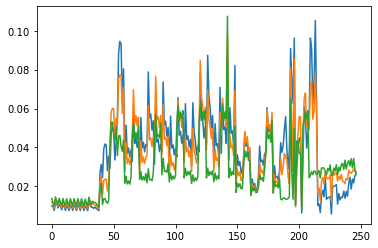

In [108]:
share_in_primary_energy(idst,'2050').plot()
share_in_primary_energy(idst,'2040').plot()
share_in_primary_energy(idst,'2030').plot()

<AxesSubplot:>

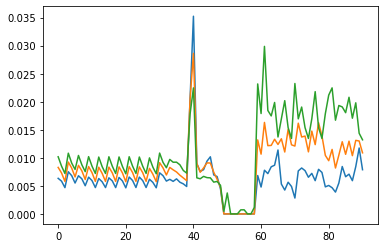

In [109]:
share_in_primary_energy(rsd_cmrc,'2050').plot()
share_in_primary_energy(rsd_cmrc,'2040').plot()
share_in_primary_energy(rsd_cmrc,'2030').plot()